In [2]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [11]:
import pandas as pd
df = pd.read_csv("/content/comments_with_sentiment.csv")
df.head()

Comment label
0              Em a ∆°iiiiiii   POS
1                   Em v·ªõi ·∫°   NEU
2                    Ib e oi   NEU
3  E d√πng g√≥i ng quen dc k a   NEU
4     c∆° s·ªü HCM c√≥ kh√°c ko ·∫°   NEU

In [12]:
# 10360 data
df

Comment label
0                                          Em a ∆°iiiiiii   POS
1                                               Em v·ªõi ·∫°   NEU
2                                                Ib e oi   NEU
3                              E d√πng g√≥i ng quen dc k a   NEU
4                                 c∆° s·ªü HCM c√≥ kh√°c ko ·∫°   NEU
...                                                  ...   ...
10356                      : ))) ·ª¶a Ngh·ªá ƒëi l·∫°c ƒë√¢u ƒë√¢y?   NEU
10357                                  Gia Linh cute v ·∫°   POS
10358  Emerson Archer clb m√¨nh con ƒëang tuy·ªÉn tv khom...   NEU
10359                         Gia Linh absolutely cinema   NEU
10360  ƒê√¢y l√† mascot c·ªßa PCA - CLB M·ªπ thu·∫≠t S√°ng t·∫°o ...   POS

[10361 rows x 2 columns]

In [13]:
df["label"].value_counts()

label
NEU    5008
POS    3051
NEG    2302
Name: count, dtype: int64

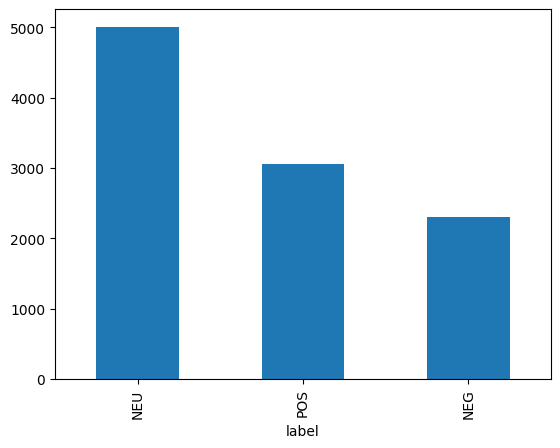

In [14]:
import matplotlib.pyplot as plt
df["label"].value_counts().plot(kind = "bar")
plt.show()

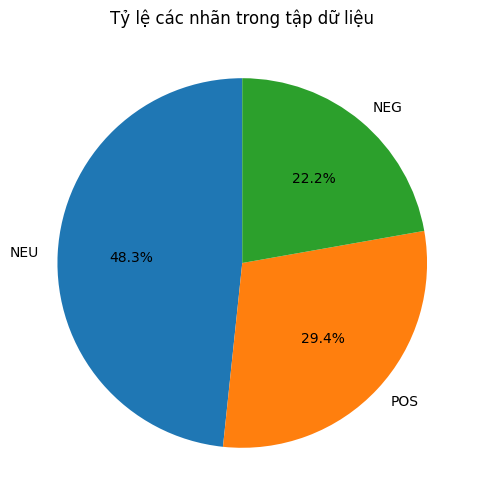

In [15]:
df["label"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(6, 6), startangle=90)

plt.title("T·ª∑ l·ªá c√°c nh√£n trong t·∫≠p d·ªØ li·ªáu")
plt.ylabel("")  # ·∫®n nh√£n tr·ª•c y
plt.show()

In [16]:
# √Ånh x·∫° nh√£n ch·ªØ sang s·ªë
mapping = {"NEG": 0, "NEU": 1, "POS": 2}
df["label"] = df["label"].map(mapping)

# Ki·ªÉm tra k·∫øt qu·∫£
df.head()


Comment  label
0              Em a ∆°iiiiiii      2
1                   Em v·ªõi ·∫°      1
2                    Ib e oi      1
3  E d√πng g√≥i ng quen dc k a      1
4     c∆° s·ªü HCM c√≥ kh√°c ko ·∫°      1

In [17]:
df.head(20)

Comment  label
0                                       Em a ∆°iiiiiii      2
1                                            Em v·ªõi ·∫°      1
2                                             Ib e oi      1
3                           E d√πng g√≥i ng quen dc k a      1
4                              c∆° s·ªü HCM c√≥ kh√°c ko ·∫°      1
5                                         Vu Cong oke      2
6                                gi√° l·∫°p vjp d∆∞ l√†o v      1
7                                      Ng√†nh g√¨ ƒë√¢y ·∫°      1
8                             Xin v√†o nh√≥m vip free ·∫°      2
9        Tr·∫ßn Qu·ªëc V∆∞·ª£ng anh ƒë·ªÉ qu·∫£ fb th·∫ø sao ntin;D      1
10  Nguy·ªÖn VƒÉn Tu·∫•n l√† sao z c√°c b v·∫´n inb ƒëc m√†. ...      1
11                       √î em cx qu√™n lu√¥n chx xin v√¥      0
12  @m·ªçi ng∆∞·ªùi n·∫øu th·∫•y hay, h√£y ·ªßng h·ªô b√†i vi·∫øt =...      2
13            Vu Cong a cx k inb ƒëc. em r√©p str a nh√©      1
14                          A ib e ƒëc kh ·∫° e kh nt ƒëc      2
15        Anh ib v·ªõi e ƒëc k ·∫°. Em k nh·∫Øn cho anh ƒëc ·∫°      2
16  Tham gia group c·ªï ƒë√¥ng ptit b·∫±ng c√°ch nh·∫Øn anh...      2
17  Nguy·ªÖn VƒÉn Tu·∫•n n·∫°p vip n√†y n√≥ h∆°i l·∫°i, e inb ...      1
18                         H√≠ ae rep story nh·∫Øn c nhe      2
19                                  Kh·ªën kh·ªï kh·ªën n·∫°n      0

# Native Bayes (unprocessed data + BoW  + imbalance)

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# 2Ô∏è‚É£ Chia d·ªØ li·ªáu
# ==========================
X = df["Comment"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==========================
# 3Ô∏è‚É£ Bi·ªÉu di·ªÖn d·ªØ li·ªáu b·∫±ng Bag of Words
# ==========================
vectorizer = CountVectorizer(max_features=5000)  # Gi·ªõi h·∫°n s·ªë t·ª´ ƒë·∫∑c tr∆∞ng
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)


In [20]:
X_train.shape, X_test.shape

((8288,), (2073,))

In [33]:
model = MultinomialNB()
model.fit(X_train_bow, y_train)

# D·ª± ƒëo√°n tr√™n train
y_pred_train = model.predict(X_train_bow)
acc_train = accuracy_score(y_train, y_pred_train)
pre_train = precision_score(y_train, y_pred_train, average='macro')
rec_train = recall_score(y_train, y_pred_train, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')

# D·ª± ƒëo√°n tr√™n test
y_pred_test = model.predict(X_test_bow)
acc_test = accuracy_score(y_test, y_pred_test)
pre_test = precision_score(y_test, y_pred_test, average='macro')
rec_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')

results = []
results.append({
        "Train_Acc": acc_train,
        "Train_Pre": pre_train,
        "Train_Rec": rec_train,
        "Train_F1": f1_train,
        "Test_Acc": acc_test,
        "Test_Pre": pre_test,
        "Test_Rec": rec_test,
        "Test_F1": f1_test
    })
metrics_df = pd.DataFrame(results)
metrics_df.index = ["Naive Bayes (unprocessed data + BoW + imbalance)"]

# L√†m ƒë·∫πp k·∫øt qu·∫£
pd.options.display.float_format = "{:.2f}".format
metrics_df

Train_Acc  Train_Pre  \
Naive Bayes (unprocessed data + BoW + imbalance)       0.74       0.76   

                                                  Train_Rec  Train_F1  \
Naive Bayes (unprocessed data + BoW + imbalance)       0.70      0.72   

                                                  Test_Acc  Test_Pre  \
Naive Bayes (unprocessed data + BoW + imbalance)      0.63      0.63   

                                                  Test_Rec  Test_F1  
Naive Bayes (unprocessed data + BoW + imbalance)      0.57     0.59

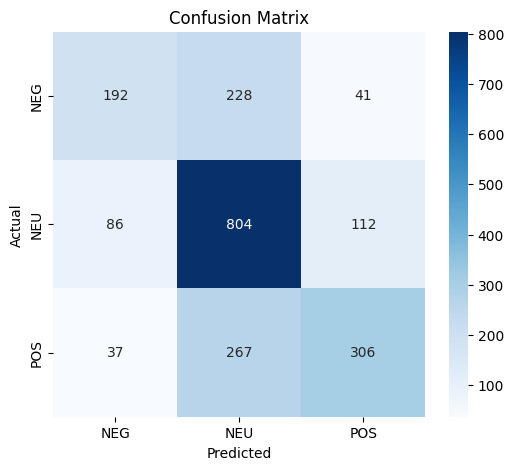

In [34]:
cm = confusion_matrix(y_test, model.predict(X_test_bow))
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["NEG", "NEU", "POS"],
            yticklabels=["NEG", "NEU", "POS"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

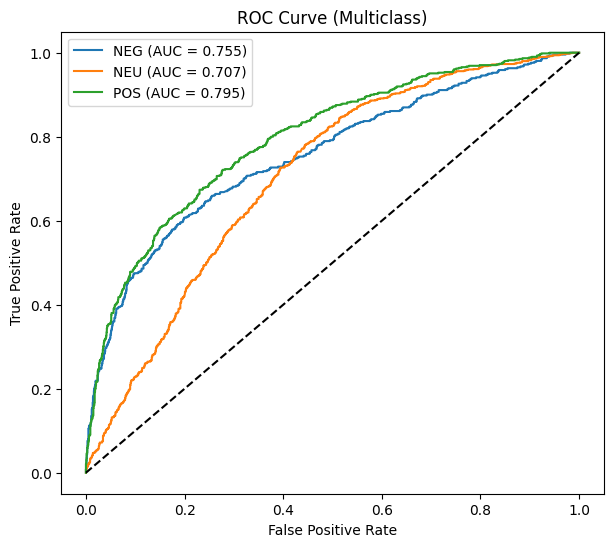

In [35]:
y_score = model.predict_proba(X_test_bow)

# ROC/AUC cho ƒëa l·ªõp (One-vs-Rest)
fpr, tpr, roc_auc = {}, {}, {}
n_classes = len(np.unique(y))

for i in range(n_classes):
    y_true_bin = (y_test == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(y_true_bin, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(7,6))
for i, label in enumerate(["NEG", "NEU", "POS"]):
    plt.plot(fpr[i], tpr[i], label=f"{label} (AUC = {roc_auc[i]:.3f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multiclass)")
plt.legend()
plt.show()

# Naive Bayes (unprocessed data + TF-IDF + imbalance)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Kh·ªüi t·∫°o model Naive Bayes
model = MultinomialNB()

# Hu·∫•n luy·ªán m√¥ h√¨nh
model.fit(X_train_tfidf, y_train)

# D·ª± ƒëo√°n
y_pred_train = model.predict(X_train_tfidf)
y_pred_test = model.predict(X_test_tfidf)

model = MultinomialNB()

# Hu·∫•n luy·ªán m√¥ h√¨nh
model.fit(X_train_tfidf, y_train)

# D·ª± ƒëo√°n
y_pred_train = model.predict(X_train_tfidf)
y_pred_test = model.predict(X_test_tfidf)

# T√≠nh metrics
metrics = {
    "Train_Acc": accuracy_score(y_train, y_pred_train),
    "Train_Pre": precision_score(y_train, y_pred_train, average="macro"),
    "Train_Rec": recall_score(y_train, y_pred_train, average="macro"),
    "Train_F1": f1_score(y_train, y_pred_train, average="macro"),
    "Test_Acc": accuracy_score(y_test, y_pred_test),
    "Test_Pre": precision_score(y_test, y_pred_test, average="macro"),
    "Test_Rec": recall_score(y_test, y_pred_test, average="macro"),
    "Test_F1": f1_score(y_test, y_pred_test, average="macro"),
}

df_metrics = pd.DataFrame([metrics])
df_metrics.index = ["Naive Bayes (unprocessed data + TF-IDF + imbalance)"]

pd.options.display.float_format = "{:.2f}".format
df_metrics


Train_Acc  Train_Pre  \
Naive Bayes (unprocessed data + TF-IDF + imbala...       0.67       0.82   

                                                    Train_Rec  Train_F1  \
Naive Bayes (unprocessed data + TF-IDF + imbala...       0.57      0.59   

                                                    Test_Acc  Test_Pre  \
Naive Bayes (unprocessed data + TF-IDF + imbala...      0.59      0.73   

                                                    Test_Rec  Test_F1  
Naive Bayes (unprocessed data + TF-IDF + imbala...      0.47     0.45

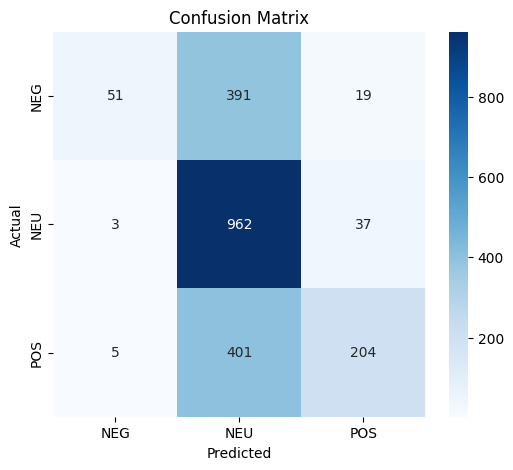

In [40]:
cm = confusion_matrix(y_test, model.predict(X_test_tfidf))
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["NEG", "NEU", "POS"],
            yticklabels=["NEG", "NEU", "POS"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

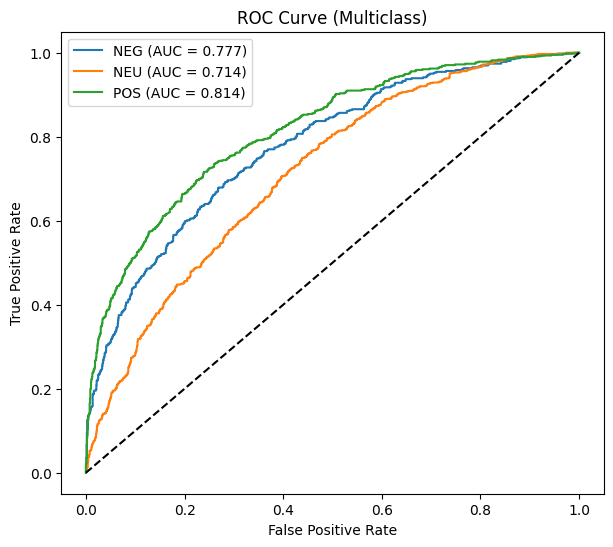

In [41]:
y_score = model.predict_proba(X_test_tfidf)

# ROC/AUC cho ƒëa l·ªõp (One-vs-Rest)
fpr, tpr, roc_auc = {}, {}, {}
n_classes = len(np.unique(y))

for i in range(n_classes):
    y_true_bin = (y_test == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(y_true_bin, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(7,6))
for i, label in enumerate(["NEG", "NEU", "POS"]):
    plt.plot(fpr[i], tpr[i], label=f"{label} (AUC = {roc_auc[i]:.3f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multiclass)")
plt.legend()
plt.show()

# SVM (unprocessed data + BoW + imbalance)

In [44]:
from sklearn.svm import LinearSVC

vectorizer = CountVectorizer(max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# ===============================
# 3. Train m√¥ h√¨nh SVM
# ===============================
model = LinearSVC(random_state=42)
model.fit(X_train_bow, y_train)

# ===============================
# 4. D·ª± ƒëo√°n v√† t√≠nh metrics
# ===============================
y_pred_train = model.predict(X_train_bow)
y_pred_test = model.predict(X_test_bow)

metrics = {
    "Train_Acc": accuracy_score(y_train, y_pred_train),
    "Train_Pre": precision_score(y_train, y_pred_train, average="macro"),
    "Train_Rec": recall_score(y_train, y_pred_train, average="macro"),
    "Train_F1": f1_score(y_train, y_pred_train, average="macro"),
    "Test_Acc": accuracy_score(y_test, y_pred_test),
    "Test_Pre": precision_score(y_test, y_pred_test, average="macro"),
    "Test_Rec": recall_score(y_test, y_pred_test, average="macro"),
    "Test_F1": f1_score(y_test, y_pred_test, average="macro"),
}

# Hi·ªÉn th·ªã metrics d·∫°ng b·∫£ng
df_metrics = pd.DataFrame([metrics])
df_metrics.index = ["SVM (unprocessed data + BoW + imbalance)"]

pd.options.display.float_format = "{:.2f}".format
df_metrics

Train_Acc  Train_Pre  Train_Rec  \
SVM (unprocessed data + BoW + imbalance)       0.92       0.93       0.90   

                                          Train_F1  Test_Acc  Test_Pre  \
SVM (unprocessed data + BoW + imbalance)      0.91      0.62      0.61   

                                          Test_Rec  Test_F1  
SVM (unprocessed data + BoW + imbalance)      0.58     0.59

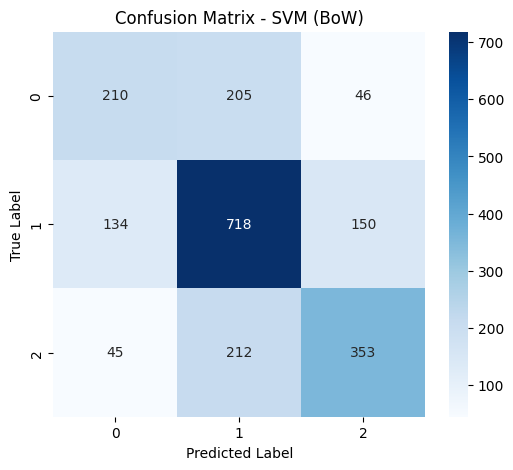

In [45]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM (BoW)")
plt.show()

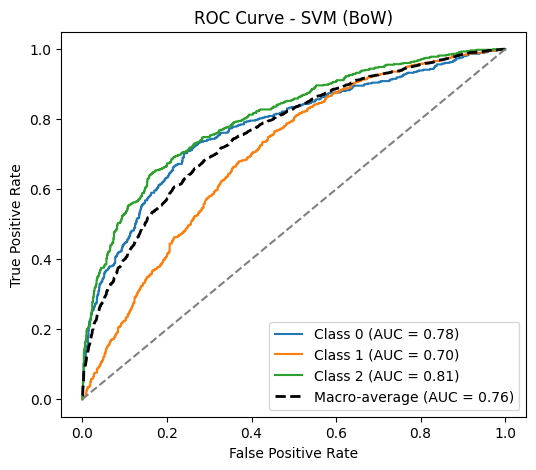

In [49]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
if y_test_bin.shape[1] == 1:
    y_test_bin = np.hstack([1 - y_test_bin, y_test_bin])

# T√≠nh x√°c su·∫•t decision function
y_score = model.decision_function(X_test_bow)

# T√≠nh ROC v√† AUC cho t·ª´ng l·ªõp
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# T√≠nh ROC macro
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_test_bin.shape[1])]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(y_test_bin.shape[1]):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= y_test_bin.shape[1]
roc_auc_macro = auc(all_fpr, mean_tpr)

# V·∫Ω ROC
plt.figure(figsize=(6, 5))
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=1.5, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot(all_fpr, mean_tpr, color='black', lw=2, linestyle='--',
         label=f'Macro-average (AUC = {roc_auc_macro:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM (BoW)")
plt.legend(loc="lower right")
plt.show()

# SVM (unprocessed data + TF-IDF + imbalance)

In [50]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# ========================================
# 3. Hu·∫•n luy·ªán m√¥ h√¨nh SVM
# ========================================
model = LinearSVC(random_state=42)
model.fit(X_train_tfidf, y_train)

# ========================================
# 4. D·ª± ƒëo√°n v√† t√≠nh metrics
# ========================================
y_pred_train = model.predict(X_train_tfidf)
y_pred_test = model.predict(X_test_tfidf)

metrics = {
    "Train_Acc": accuracy_score(y_train, y_pred_train),
    "Train_Pre": precision_score(y_train, y_pred_train, average="macro"),
    "Train_Rec": recall_score(y_train, y_pred_train, average="macro"),
    "Train_F1": f1_score(y_train, y_pred_train, average="macro"),
    "Test_Acc": accuracy_score(y_test, y_pred_test),
    "Test_Pre": precision_score(y_test, y_pred_test, average="macro"),
    "Test_Rec": recall_score(y_test, y_pred_test, average="macro"),
    "Test_F1": f1_score(y_test, y_pred_test, average="macro"),
}

# Hi·ªÉn th·ªã b·∫£ng metrics
df_metrics = pd.DataFrame([metrics])
df_metrics.index = ["SVM (unprocessed data + TF-IDF + imbalance)"]

pd.options.display.float_format = "{:.2f}".format
df_metrics

Train_Acc  Train_Pre  Train_Rec  \
SVM (unprocessed data + TF-IDF + imbalance)       0.88       0.89       0.86   

                                             Train_F1  Test_Acc  Test_Pre  \
SVM (unprocessed data + TF-IDF + imbalance)      0.87      0.64      0.64   

                                             Test_Rec  Test_F1  
SVM (unprocessed data + TF-IDF + imbalance)      0.61     0.62

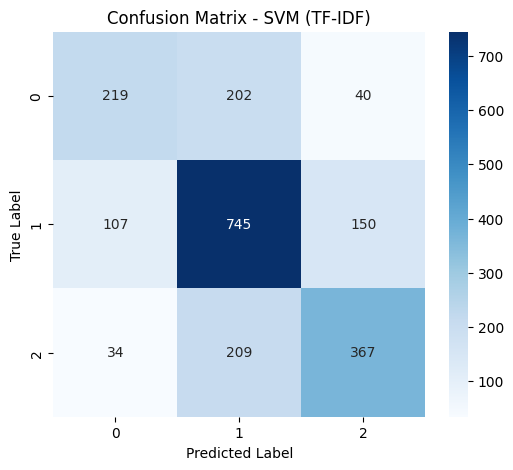

In [53]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM (TF-IDF)")
plt.show()

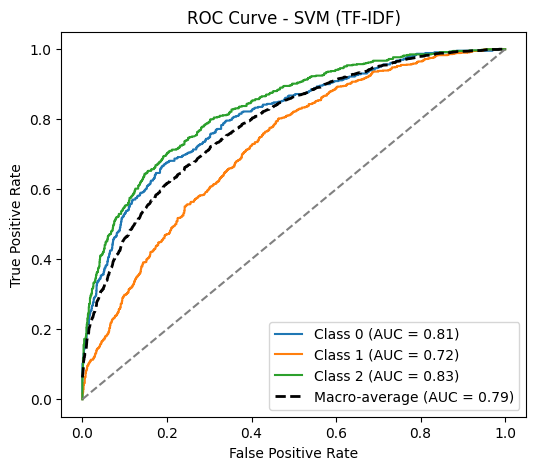

In [54]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
if y_test_bin.shape[1] == 1:
    y_test_bin = np.hstack([1 - y_test_bin, y_test_bin])

# T√≠nh score (decision function)
y_score = model.decision_function(X_test_tfidf)

# T√≠nh ROC v√† AUC cho t·ª´ng l·ªõp
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# T√≠nh ROC macro
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_test_bin.shape[1])]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(y_test_bin.shape[1]):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= y_test_bin.shape[1]
roc_auc_macro = auc(all_fpr, mean_tpr)

# V·∫Ω ROC
plt.figure(figsize=(6, 5))
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=1.5, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot(all_fpr, mean_tpr, color='black', lw=2, linestyle='--',
         label=f'Macro-average (AUC = {roc_auc_macro:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM (TF-IDF)")
plt.legend(loc="lower right")
plt.show()


# SVM (unprocessed data + WordEmbedding + imbalance)

In [57]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns
embed_model = SentenceTransformer("intfloat/multilingual-e5-large")

X = df["Comment"].tolist()
y = df["label"].tolist()

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Theo h∆∞·ªõng d·∫´n, v·ªõi E5, ƒë·ªÉ c√≥ hi·ªáu qu·∫£ t·ªët h∆°n c√≥ th·ªÉ th√™m ti·ªÅn t·ªë ‚Äúquery:‚Äù ho·∫∑c ‚Äúpassage:‚Äù t√πy t√°c v·ª• :contentReference[oaicite:1]{index=1}
# ·ªû ƒë√¢y l√† classification, n√™n ta ch·ªâ encode text th·∫≥ng
X_train_emb = embed_model.encode(X_train, show_progress_bar=True, convert_to_numpy=True)
X_test_emb = embed_model.encode(X_test, show_progress_bar=True, convert_to_numpy=True)

# ========== 3. Hu·∫•n luy·ªán SVM ==========
# S·ª≠ d·ª•ng SVM v·ªõi kernel tuy·∫øn t√≠nh (Linear SVC) ho·∫∑c SVC cho vector t√≠nh li√™n t·ª•c
model = SVC(kernel="linear", probability=True, random_state=42)
# n·∫øu mu·ªën d√πng LinearSVC nh∆∞ng LinearSVC kh√¥ng h·ªó tr·ª£ probability=True => ch·ªâ d√πng decision_function

model.fit(X_train_emb, y_train)

# ========== 4. D·ª± ƒëo√°n & t√≠nh metrics ==========
y_pred_train = model.predict(X_train_emb)
y_pred_test = model.predict(X_test_emb)

metrics = {
    "Train_Acc": accuracy_score(y_train, y_pred_train),
    "Train_Pre": precision_score(y_train, y_pred_train, average="macro"),
    "Train_Rec": recall_score(y_train, y_pred_train, average="macro"),
    "Train_F1": f1_score(y_train, y_pred_train, average="macro"),
    "Test_Acc": accuracy_score(y_test, y_pred_test),
    "Test_Pre": precision_score(y_test, y_pred_test, average="macro"),
    "Test_Rec": recall_score(y_test, y_pred_test, average="macro"),
    "Test_F1": f1_score(y_test, y_pred_test, average="macro"),
}

df_metrics = pd.DataFrame([metrics])
df_metrics.index = ["SVM (unprocessed data + E5 embeddings + imbalance)"]
pd.options.display.float_format = "{:.2f}".format
df_metrics

Batches:   0%|          | 0/259 [00:00<?, ?it/s]

Batches:   0%|          | 0/65 [00:00<?, ?it/s]

Train_Acc  Train_Pre  \
SVM (unprocessed data + E5 embeddings + imbalance)       0.67       0.70   

                                                    Train_Rec  Train_F1  \
SVM (unprocessed data + E5 embeddings + imbalance)       0.60      0.62   

                                                    Test_Acc  Test_Pre  \
SVM (unprocessed data + E5 embeddings + imbalance)      0.65      0.67   

                                                    Test_Rec  Test_F1  
SVM (unprocessed data + E5 embeddings + imbalance)      0.57     0.59

# Ti·ªÅn x·ª≠ l√Ω vƒÉn b·∫£n

In [58]:
!pip install underthesea

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.3/8.3 MB 45.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 978.4/978.4 kB 63.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 78.4 MB/s eta 0:00:00


In [64]:
import pandas as pd
import re
from underthesea import word_tokenize

# üîπ ƒê·ªçc d·ªØ li·ªáu g·ªëc
df = pd.read_csv("comments_with_sentiment.csv")

# üîπ H√†m chu·∫©n h√≥a vƒÉn b·∫£n
def clean_vietnamese_text(text):
    if pd.isna(text):
        return ""

    # 1Ô∏è‚É£ Chuy·ªÉn v·ªÅ ch·ªØ th∆∞·ªùng
    text = text.lower()

    # 2Ô∏è‚É£ Lo·∫°i b·ªè URL, email, k√Ω t·ª± ƒë·∫∑c bi·ªát, s·ªë
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"\S+@\S+", '', text)
    text = re.sub(r"[^a-zA-Z√Ä-·ª∏√†-·ªπ\s]", " ", text)

    # 3Ô∏è‚É£ Chu·∫©n h√≥a t·ª´ vi·∫øt t·∫Øt v√† t·ª´ m·∫°ng
    replace_dict = {
        "ko": "kh√¥ng", "k": "kh√¥ng", "hok": "kh√¥ng",
        "kg": "kh√¥ng", "khg": "kh√¥ng", "kh": "kh√¥ng",
        "j": "g√¨", "z": "d", "vs": "v·ªõi", "wa": "qu√°",
        "thjk": "th√≠ch", "cx": "c≈©ng", "ƒëc": "ƒë∆∞·ª£c",
        "dc": "ƒë∆∞·ª£c", "sp": "s·∫£n ph·∫©m", "okie": "ok", "oke": "ok", "nt": "nh·∫Øn tin", "ib": "inbox", "chx": "ch∆∞a",
        "fb": "facebook", "inb": "inbox", "ntin": "nh·∫Øn tin", "str": "story"
    }
    for k, v in replace_dict.items():
        text = re.sub(r"\b{}\b".format(k), v, text)

    # 4Ô∏è‚É£ T√°ch t·ª´ b·∫±ng underthesea
    text = word_tokenize(text, format="text")

    # 5Ô∏è‚É£ Lo·∫°i b·ªè stop words nh·∫π (kh√¥ng lo·∫°i ‚Äúkh√¥ng‚Äù, ‚Äúch·∫≥ng‚Äù, ‚Äúch∆∞a‚Äù)
    stop_words = {"v√†", "th√¨", "l√†", "c√≥", "ƒë√£", "n√†y", "·∫•y", "r·ªìi", "n·ªØa"}
    text = " ".join([word for word in text.split() if word not in stop_words])

    # 6Ô∏è‚É£ X√≥a kho·∫£ng tr·∫Øng d∆∞ th·ª´a
    text = re.sub(r"\s+", " ", text).strip()

    return text

# üîπ √Åp d·ª•ng cho to√†n b·ªô c·ªôt vƒÉn b·∫£n
df['cleaned_text'] = df['Comment'].apply(clean_vietnamese_text)

# üîπ Hi·ªÉn th·ªã m·∫´u k·∫øt qu·∫£
df.head()


Comment label                     cleaned_text
0              Em a ∆°iiiiiii   POS                    em a ∆°iiiiiii
1                   Em v·ªõi ·∫°   NEU                         em v·ªõi ·∫°
2                    Ib e oi   NEU                       inbox e_oi
3  E d√πng g√≥i ng quen dc k a   NEU  e d√πng g√≥i ng quen ƒë∆∞·ª£c kh√¥ng a
4     c∆° s·ªü HCM c√≥ kh√°c ko ·∫°   NEU           c∆°_s·ªü hcm kh√°c kh√¥ng ·∫°

In [65]:
df.head(30)

Comment label  \
0                                       Em a ∆°iiiiiii   POS   
1                                            Em v·ªõi ·∫°   NEU   
2                                             Ib e oi   NEU   
3                           E d√πng g√≥i ng quen dc k a   NEU   
4                              c∆° s·ªü HCM c√≥ kh√°c ko ·∫°   NEU   
5                                         Vu Cong oke   POS   
6                                gi√° l·∫°p vjp d∆∞ l√†o v   NEU   
7                                      Ng√†nh g√¨ ƒë√¢y ·∫°   NEU   
8                             Xin v√†o nh√≥m vip free ·∫°   POS   
9        Tr·∫ßn Qu·ªëc V∆∞·ª£ng anh ƒë·ªÉ qu·∫£ fb th·∫ø sao ntin;D   NEU   
10  Nguy·ªÖn VƒÉn Tu·∫•n l√† sao z c√°c b v·∫´n inb ƒëc m√†. ...   NEU   
11                       √î em cx qu√™n lu√¥n chx xin v√¥   NEG   
12  @m·ªçi ng∆∞·ªùi n·∫øu th·∫•y hay, h√£y ·ªßng h·ªô b√†i vi·∫øt =...   POS   
13            Vu Cong a cx k inb ƒëc. em r√©p str a nh√©   NEU   
14                          A ib e ƒëc kh ·∫° e kh nt ƒëc   POS   
15        Anh ib v·ªõi e ƒëc k ·∫°. Em k nh·∫Øn cho anh ƒëc ·∫°   POS   
16  Tham gia group c·ªï ƒë√¥ng ptit b·∫±ng c√°ch nh·∫Øn anh...   POS   
17  Nguy·ªÖn VƒÉn Tu·∫•n n·∫°p vip n√†y n√≥ h∆°i l·∫°i, e inb ...   NEU   
18                         H√≠ ae rep story nh·∫Øn c nhe   POS   
19                                  Kh·ªën kh·ªï kh·ªën n·∫°n   NEG   
20  @m·ªçi ng∆∞·ªùi nh·∫Øn anh t·∫∑ng t√†i li·ªáu √¥n t·∫≠p c·∫•p t...   POS   
21                           ƒê·ªôi l·ª•t ƒëi thi lun √° ch·ªõ   NEU   
22              @m·ªçi ng∆∞·ªùi ae rep story nh·∫Øn c nheeee   POS   
23  1.L√Ω Vƒ©nh Tuy√™n - ng∆∞·ªùi c√≥ t√†i kho·∫£n Facebook ...   NEG   
24                             Sƒët/zalo: 0359923375).   NEU   
25  L√Ω Vƒ©nh Tuy√™n, Nguy·ªÖn Minh Tr√≠, Minh Phuong Ng...   POS   
26  Trung t√¢m Ph√°t ƒê·∫°t ƒëang ƒë√£ c√≥ l·ªãch thi b·∫±ng h·∫°...   POS   
27                      2. H·ªçc vi·ªán √¢m nh·∫°c qu·ªëc gia.   NEU   
28  H√¥m nay m√¨nh xin v·∫°ch tr·∫ßn s·ª± th·∫≠t v·ªÅ 3 b·∫°n l√†...   NEG   
29         1.H·ªçc vi·ªán c√¥ng ngh·ªá b∆∞u ch√≠nh vi·ªÖn th√¥ng.   NEU   

                                         cleaned_text  
0                                       em a ∆°iiiiiii  
1                                            em v·ªõi ·∫°  
2                                          inbox e_oi  
3                     e d√πng g√≥i ng quen ƒë∆∞·ª£c kh√¥ng a  
4                              c∆°_s·ªü hcm kh√°c kh√¥ng ·∫°  
5                                          vu cong ok  
6                                gi√° l·∫°p vjp d∆∞_l√†o v  
7                                      ng√†nh g√¨ ƒë√¢y ·∫°  
8                             xin v√†o nh√≥m vip free ·∫°  
9   tr·∫ßn qu·ªëc_v∆∞·ª£ng anh ƒë·ªÉ qu·∫£ facebook th·∫ø sao nh...  
10  nguy·ªÖn_vƒÉn_tu·∫•n sao d c√°c b v·∫´n inbox ƒë∆∞·ª£c m√† ...  
11                    √¥ em c≈©ng qu√™n lu√¥n ch∆∞a xin v√¥  
12  m·ªçi ng∆∞·ªùi n·∫øu th·∫•y hay h√£y ·ªßng_h·ªô b√†i vi·∫øt tym...  
13  vu cong_a c≈©ng kh√¥ng inbox ƒë∆∞·ª£c em r√©p story a...  
14       a inbox e ƒë∆∞·ª£c kh√¥ng ·∫°_e kh√¥ng nh·∫Øn_tin ƒë∆∞·ª£c  
15  anh inbox v·ªõi e ƒë∆∞·ª£c kh√¥ng ·∫° em kh√¥ng nh·∫Øn cho...  
16  tham_gia group c·ªï_ƒë√¥ng ptit b·∫±ng c√°ch nh·∫Øn anh...  
17   nguy·ªÖn_vƒÉn_tu·∫•n n·∫°p vip n√≥ h∆°i l·∫°i e inbox a nh√©  
18                         h√≠ ae rep story nh·∫Øn_c nhe  
19                                  kh·ªën_kh·ªï kh·ªën_n·∫°n  
20  m·ªçi ng∆∞·ªùi nh·∫Øn anh t·∫∑ng t√†i_li·ªáu √¥n_t·∫≠p c·∫•p_t·ªë...  
21                           ƒë·ªôi l·ª•t ƒëi thi lun √° ch·ªõ  
22               m·ªçi ng∆∞·ªùi ae rep story nh·∫Øn c nheeee  
23  l√Ω vƒ©nh_tuy√™n ng∆∞·ªùi t√†i_kho·∫£n facebook t√™n l√Ω ...  
24                                           sƒët zalo  
25   l√Ω vƒ©nh_tuy√™n nguy·ªÖn_minh_tr√≠ minh_phuong nguyen  
26  trung_t√¢m ph√°t_ƒë·∫°t ƒëang l·ªãch thi b·∫±ng h·∫°ng a a...  
27                          h·ªçc_vi·ªán √¢m_nh·∫°c qu·ªëc_gia  
28  h√¥m_nay m√¨nh x

# D√πng Oversampling

In [67]:
X = df['cleaned_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

train_df = pd.DataFrame({'text': X_train.values, 'label': y_train.values}).reset_index(drop=True)
test_df  = pd.DataFrame({'text': X_test.values,  'label': y_test.values}).reset_index(drop=True)

print("\nTrain shape:", train_df.shape, "Test shape:", test_df.shape)
print("Train class counts (before balancing):\n", train_df['label'].value_counts())

# ========== 3. C√¢n b·∫±ng d·ªØ li·ªáu tr√™n t·∫≠p train b·∫±ng UpSampling ==========
class_counts = train_df['label'].value_counts()
max_count = class_counts.max()

upsampled = []
for cls, cnt in class_counts.items():
    cls_df = train_df[train_df['label'] == cls]
    if cnt < max_count:
        sampled = cls_df.sample(max_count, replace=True, random_state=42)
        upsampled.append(sampled)
    else:
        upsampled.append(cls_df)
train_balanced = pd.concat(upsampled).sample(frac=1, random_state=42).reset_index(drop=True)

print("\nTrain class counts (after upsampling):\n", train_balanced['label'].value_counts())


Train shape: (8288, 2) Test shape: (2073, 2)
Train class counts (before balancing):
 label
NEU    4006
POS    2441
NEG    1841
Name: count, dtype: int64

Train class counts (after upsampling):
 label
POS    4006
NEG    4006
NEU    4006
Name: count, dtype: int64


In [71]:
vectorizer = CountVectorizer(max_features=5000)
X_train_bow = vectorizer.fit_transform(train_balanced['text'])
X_test_bow  = vectorizer.transform(test_df['text'])


model = MultinomialNB()
model.fit(X_train_bow, train_balanced['label'])

y_pred_train = model.predict(X_train_bow)
y_pred_test  = model.predict(X_test_bow)

# metrics train
acc_tr = accuracy_score(train_balanced['label'], y_pred_train)
pre_tr = precision_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)
rec_tr = recall_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)
f1_tr  = f1_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)

# metrics test
acc_te = accuracy_score(test_df['label'], y_pred_test)
pre_te = precision_score(test_df['label'], y_pred_test, average='macro', zero_division=0)
rec_te = recall_score(test_df['label'], y_pred_test, average='macro', zero_division=0)
f1_te  = f1_score(test_df['label'], y_pred_test, average='macro', zero_division=0)

results = []
results.append({
        'Train_Acc': acc_tr, 'Train_Precision': pre_tr, 'Train_Recall': rec_tr, 'Train_F1': f1_tr,
        'Test_Acc': acc_te,  'Test_Precision': pre_te,  'Test_Recall': rec_te,  'Test_F1': f1_te
    })
metrics_df = pd.DataFrame(results)
metrics_df.index = ["Naive Bayes (preprocessed data + BoW + oversample)"]

# L√†m ƒë·∫πp k·∫øt qu·∫£
pd.options.display.float_format = "{:.2f}".format
metrics_df

Train_Acc  \
Naive Bayes (preprocessed data + BoW + oversample)       0.78   

                                                    Train_Precision  \
Naive Bayes (preprocessed data + BoW + oversample)             0.78   

                                                    Train_Recall  Train_F1  \
Naive Bayes (preprocessed data + BoW + oversample)          0.78      0.78   

                                                    Test_Acc  Test_Precision  \
Naive Bayes (preprocessed data + BoW + oversample)      0.56            0.55   

                                                    Test_Recall  Test_F1  
Naive Bayes (preprocessed data + BoW + oversample)         0.55     0.55

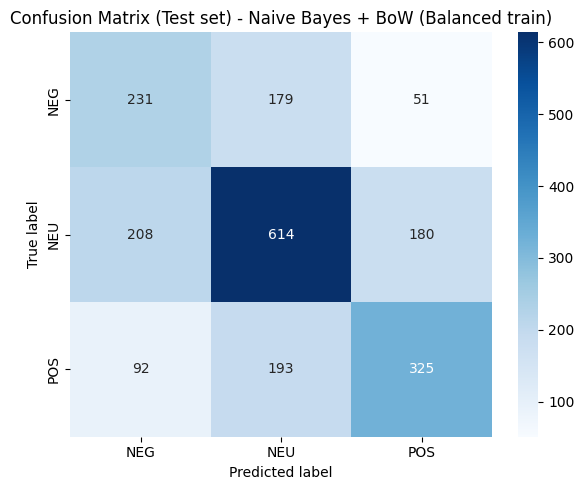

In [73]:
y_pred_test_final = model.predict(X_test_bow)
labels = list(model.classes_)  # ƒë·∫£m b·∫£o th·ª© t·ª± tr√πng v·ªõi predict_proba
cm = confusion_matrix(test_df['label'], y_pred_test_final, labels=labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Test set) - Naive Bayes + BoW (Balanced train)")
plt.tight_layout()
plt.show()

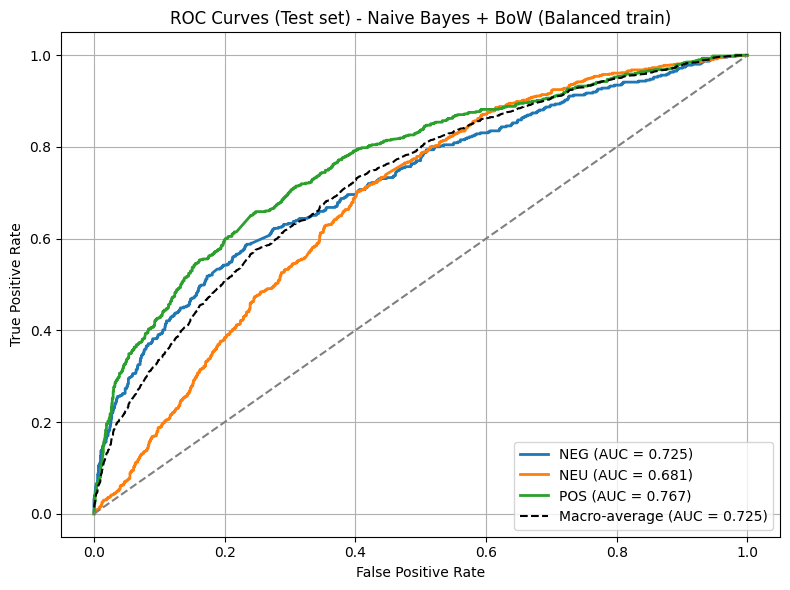

In [74]:
classes = np.array(model.classes_)
y_test_bin = label_binarize(test_df['label'], classes=classes)
n_classes = y_test_bin.shape[1]

# predict_proba
y_score = model.predict_proba(X_test_bow)  # shape (n_samples, n_classes) in order model.classes_

# T√≠nh fpr/tpr/auc cho t·ª´ng l·ªõp n·∫øu l·ªõp c√≥ d∆∞∆°ng sample trong test
fpr = dict(); tpr = dict(); roc_auc = dict()
for i, cls in enumerate(classes):
    # ki·ªÉm tra l·ªõp c√≥ trong test kh√¥ng
    if cls in test_df['label'].values:
        # t√¨m index c·ªßa cls trong classes (t∆∞∆°ng ·ª©ng c·ªôt y_test_bin)
        col_index = list(classes).index(cls)
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, col_index], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    else:
        # n·∫øu l·ªõp kh√¥ng xu·∫•t hi·ªán trong test, b·ªè qua
        fpr[i], tpr[i], roc_auc[i] = np.array([0,1]), np.array([0,1]), np.nan

# V·∫Ω ROC
plt.figure(figsize=(8,6))
plotted = False
for i, cls in enumerate(classes):
    if not np.isnan(roc_auc[i]):
        plt.plot(fpr[i], tpr[i], lw=2, label=f"{cls} (AUC = {roc_auc[i]:.3f})")
        plotted = True

if not plotted:
    print("Kh√¥ng c√≥ l·ªõp h·ª£p l·ªá ƒë·ªÉ v·∫Ω ROC (c√≥ th·ªÉ do test set thi·∫øu l·ªõp n√†o ƒë√≥).")
else:
    # macro-average
    valid_idxs = [i for i in range(len(classes)) if not np.isnan(roc_auc[i])]
    all_fpr = np.unique(np.concatenate([fpr[i] for i in valid_idxs]))
    mean_tpr = np.zeros_like(all_fpr, dtype=float)
    for i in valid_idxs:
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= len(valid_idxs)
    roc_auc_macro = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr, linestyle='--', color='black', label=f"Macro-average (AUC = {roc_auc_macro:.3f})")
    plt.plot([0,1], [0,1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves (Test set) - Naive Bayes + BoW (Balanced train)")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# D√πng Smote

In [75]:
df

Comment label  \
0                                          Em a ∆°iiiiiii   POS   
1                                               Em v·ªõi ·∫°   NEU   
2                                                Ib e oi   NEU   
3                              E d√πng g√≥i ng quen dc k a   NEU   
4                                 c∆° s·ªü HCM c√≥ kh√°c ko ·∫°   NEU   
...                                                  ...   ...   
10356                      : ))) ·ª¶a Ngh·ªá ƒëi l·∫°c ƒë√¢u ƒë√¢y?   NEU   
10357                                  Gia Linh cute v ·∫°   POS   
10358  Emerson Archer clb m√¨nh con ƒëang tuy·ªÉn tv khom...   NEU   
10359                         Gia Linh absolutely cinema   NEU   
10360  ƒê√¢y l√† mascot c·ªßa PCA - CLB M·ªπ thu·∫≠t S√°ng t·∫°o ...   POS   

                                            cleaned_text  
0                                          em a ∆°iiiiiii  
1                                               em v·ªõi ·∫°  
2                                             inbox e_oi  
3                        e d√πng g√≥i ng quen ƒë∆∞·ª£c kh√¥ng a  
4                                 c∆°_s·ªü hcm kh√°c kh√¥ng ·∫°  
...                                                  ...  
10356                             ·ªßa_ngh·ªá ƒëi_l·∫°c ƒë√¢u_ƒë√¢y  
10357                                  gia linh_cute v ·∫°  
10358  emerson archer clb m√¨nh con ƒëang tuy·ªÉn tv khom...  
10359                         gia_linh absolutely cinema  
10360  ƒë√¢y mascot c·ªßa pca_clb m·ªπ_thu·∫≠t s√°ng_t·∫°o ptit_...  

[10361 rows x 3 columns]

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

X = df['cleaned_text']
y = df['label']

# === 2. Chia d·ªØ li·ªáu tr∆∞·ªõc, gi·ªØ stratify ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Tr∆∞·ªõc SMOTE:")
print(y_train.value_counts())

# === 3. BoW tr∆∞·ªõc khi SMOTE ===
vectorizer = CountVectorizer(max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow  = vectorizer.transform(X_test)

# === 4. √Åp d·ª•ng SMOTE tr√™n t·∫≠p train ===
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_bow, y_train)

print("\nSau SMOTE:")
print(pd.Series(y_train_bal).value_counts())

# === 5. Train m√¥ h√¨nh Naive Bayes ===
model = MultinomialNB()
model.fit(X_train_bal, y_train_bal)

# === 6. D·ª± ƒëo√°n ===
y_pred_train = model.predict(X_train_bal)
y_pred_test  = model.predict(X_test_bow)

# === 7. T√≠nh metrics ===
acc_tr = accuracy_score(y_train_bal, y_pred_train)
pre_tr = precision_score(y_train_bal, y_pred_train, average='macro', zero_division=0)
rec_tr = recall_score(y_train_bal, y_pred_train, average='macro', zero_division=0)
f1_tr  = f1_score(y_train_bal, y_pred_train, average='macro', zero_division=0)

acc_te = accuracy_score(y_test, y_pred_test)
pre_te = precision_score(y_test, y_pred_test, average='macro', zero_division=0)
rec_te = recall_score(y_test, y_pred_test, average='macro', zero_division=0)
f1_te  = f1_score(y_test, y_pred_test, average='macro', zero_division=0)

# === 8. Hi·ªÉn th·ªã k·∫øt qu·∫£ ===
results = [{
    'Train_Acc': acc_tr, 'Train_Pre': pre_tr, 'Train_Rec': rec_tr, 'Train_F1': f1_tr,
    'Test_Acc': acc_te, 'Test_Pre': pre_te, 'Test_Rec': rec_te, 'Test_F1': f1_te
}]
metrics_df = pd.DataFrame(results)
metrics_df.index = ["Naive Bayes (BoW + SMOTE)"]

pd.options.display.float_format = "{:.2f}".format
display(metrics_df)

Tr∆∞·ªõc SMOTE:
label
NEU    4006
POS    2441
NEG    1841
Name: count, dtype: int64

Sau SMOTE:
label
POS    4006
NEU    4006
NEG    4006
Name: count, dtype: int64


Train_Acc  Train_Pre  Train_Rec  Train_F1  \
Naive Bayes (BoW + SMOTE)       0.71       0.72       0.71      0.71   

                           Test_Acc  Test_Pre  Test_Rec  Test_F1  
Naive Bayes (BoW + SMOTE)      0.56      0.55      0.56     0.55

# SVM (preprocessed data + BoW + oversample)

In [79]:
from sklearn.utils import resample
X = df['cleaned_text']
y = df['label']

# ================== 2. CHIA T·∫¨P D·ªÆ LI·ªÜU ==================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

train_df = pd.DataFrame({'text': X_train, 'label': y_train}).reset_index(drop=True)
test_df = pd.DataFrame({'text': X_test, 'label': y_test}).reset_index(drop=True)

print("Train class counts (before balancing):\n", train_df['label'].value_counts())

# ================== 3. OVERSAMPLING TR√äN T·∫¨P TRAIN ==================
class_counts = train_df['label'].value_counts()
max_count = class_counts.max()

oversampled = []
for cls, cnt in class_counts.items():
    cls_df = train_df[train_df['label'] == cls]
    if cnt < max_count:
        sampled = resample(cls_df, replace=True, n_samples=max_count, random_state=42)
        oversampled.append(sampled)
    else:
        oversampled.append(cls_df)

train_balanced = pd.concat(oversampled).sample(frac=1, random_state=42).reset_index(drop=True)
print("\nTrain class counts (after oversampling):\n", train_balanced['label'].value_counts())

# ================== 4. TF-IDF VECTORIZE ==================
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(train_balanced['text'])
X_test_tfidf = tfidf.transform(test_df['text'])

# ================== 5. TRAIN NAIVE BAYES ==================
model = MultinomialNB()
model.fit(X_train_tfidf, train_balanced['label'])

y_pred_train = model.predict(X_train_tfidf)
y_pred_test  = model.predict(X_test_tfidf)

# metrics train
acc_tr = accuracy_score(train_balanced['label'], y_pred_train)
pre_tr = precision_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)
rec_tr = recall_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)
f1_tr  = f1_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)

# metrics test
acc_te = accuracy_score(test_df['label'], y_pred_test)
pre_te = precision_score(test_df['label'], y_pred_test, average='macro', zero_division=0)
rec_te = recall_score(test_df['label'], y_pred_test, average='macro', zero_division=0)
f1_te  = f1_score(test_df['label'], y_pred_test, average='macro', zero_division=0)

results = []
results.append({
        'Train_Acc': acc_tr, 'Train_Precision': pre_tr, 'Train_Recall': rec_tr, 'Train_F1': f1_tr,
        'Test_Acc': acc_te,  'Test_Precision': pre_te,  'Test_Recall': rec_te,  'Test_F1': f1_te
    })
metrics_df = pd.DataFrame(results)
metrics_df.index = ["Naive Bayes (preprocessed data + BoW + oversample)"]

# L√†m ƒë·∫πp k·∫øt qu·∫£
pd.options.display.float_format = "{:.2f}".format
metrics_df

Train class counts (before balancing):
 label
NEU    4006
POS    2441
NEG    1841
Name: count, dtype: int64

Train class counts (after oversampling):
 label
POS    4006
NEG    4006
NEU    4006
Name: count, dtype: int64


Train_Acc  \
Naive Bayes (preprocessed data + BoW + oversample)       0.81   

                                                    Train_Precision  \
Naive Bayes (preprocessed data + BoW + oversample)             0.81   

                                                    Train_Recall  Train_F1  \
Naive Bayes (preprocessed data + BoW + oversample)          0.81      0.81   

                                                    Test_Acc  Test_Precision  \
Naive Bayes (preprocessed data + BoW + oversample)      0.58            0.56   

                                                    Test_Recall  Test_F1  
Naive Bayes (preprocessed data + BoW + oversample)         0.56     0.56

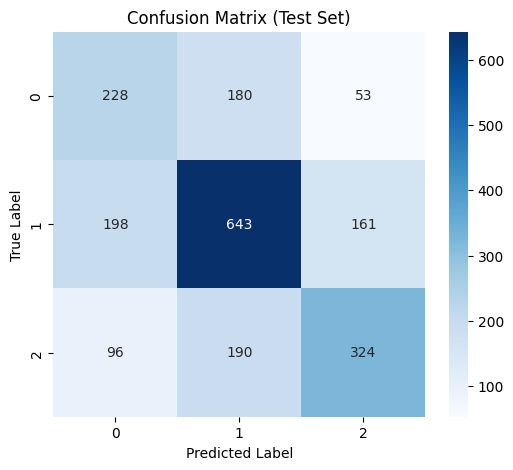

In [81]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(test_df['label'], y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

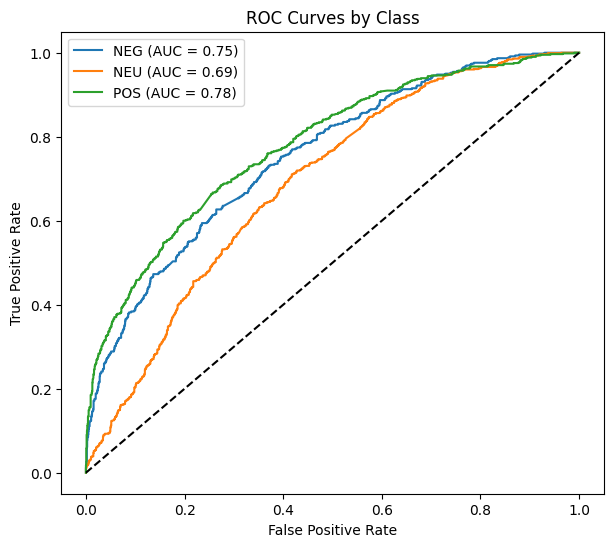

In [82]:
from sklearn.preprocessing import label_binarize
labels = sorted(df['label'].unique())
y_test_bin = label_binarize(test_df['label'], classes=labels)
y_pred_prob = model.predict_proba(X_test_tfidf)

plt.figure(figsize=(7,6))
for i, label in enumerate(labels):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curves by Class")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# SVM (preprocessed data + BoW + oversample)

In [83]:
X = df['cleaned_text']
y = df['label']

# ================== 3. CHIA D·ªÆ LI·ªÜU ==================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

train_df = pd.DataFrame({'text': X_train, 'label': y_train}).reset_index(drop=True)
test_df = pd.DataFrame({'text': X_test, 'label': y_test}).reset_index(drop=True)

print("Train class counts (before balancing):\n", train_df['label'].value_counts())

# ================== 4. OVERSAMPLING TR√äN TRAIN ==================
class_counts = train_df['label'].value_counts()
max_count = class_counts.max()
oversampled = []

for cls, cnt in class_counts.items():
    cls_df = train_df[train_df['label'] == cls]
    if cnt < max_count:
        sampled = resample(cls_df, replace=True, n_samples=max_count, random_state=42)
        oversampled.append(sampled)
    else:
        oversampled.append(cls_df)

train_balanced = pd.concat(oversampled).sample(frac=1, random_state=42).reset_index(drop=True)

print("\nTrain class counts (after oversampling):\n", train_balanced['label'].value_counts())

# ================== 5. EMBEDDING BoW ==================
vectorizer = CountVectorizer(max_features=5000)
X_train_bow = vectorizer.fit_transform(train_balanced['text'])
X_test_bow = vectorizer.transform(test_df['text'])

# ================== 6. HU·∫§N LUY·ªÜN SVM ==================
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train_bow, train_balanced['label'])

y_pred_train = model.predict(X_train_bow)
y_pred_test  = model.predict(X_test_bow)

# metrics train
acc_tr = accuracy_score(train_balanced['label'], y_pred_train)
pre_tr = precision_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)
rec_tr = recall_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)
f1_tr  = f1_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)

# metrics test
acc_te = accuracy_score(test_df['label'], y_pred_test)
pre_te = precision_score(test_df['label'], y_pred_test, average='macro', zero_division=0)
rec_te = recall_score(test_df['label'], y_pred_test, average='macro', zero_division=0)
f1_te  = f1_score(test_df['label'], y_pred_test, average='macro', zero_division=0)

results = []
results.append({
        'Train_Acc': acc_tr, 'Train_Precision': pre_tr, 'Train_Recall': rec_tr, 'Train_F1': f1_tr,
        'Test_Acc': acc_te,  'Test_Precision': pre_te,  'Test_Recall': rec_te,  'Test_F1': f1_te
    })
metrics_df = pd.DataFrame(results)
metrics_df.index = ["Naive Bayes (preprocessed data + BoW + oversample)"]

# L√†m ƒë·∫πp k·∫øt qu·∫£
pd.options.display.float_format = "{:.2f}".format
metrics_df

Train class counts (before balancing):
 label
NEU    4006
POS    2441
NEG    1841
Name: count, dtype: int64

Train class counts (after oversampling):
 label
POS    4006
NEG    4006
NEU    4006
Name: count, dtype: int64


Train_Acc  \
Naive Bayes (preprocessed data + BoW + oversample)       0.91   

                                                    Train_Precision  \
Naive Bayes (preprocessed data + BoW + oversample)             0.91   

                                                    Train_Recall  Train_F1  \
Naive Bayes (preprocessed data + BoW + oversample)          0.91      0.91   

                                                    Test_Acc  Test_Precision  \
Naive Bayes (preprocessed data + BoW + oversample)      0.57            0.55   

                                                    Test_Recall  Test_F1  
Naive Bayes (preprocessed data + BoW + oversample)         0.53     0.54

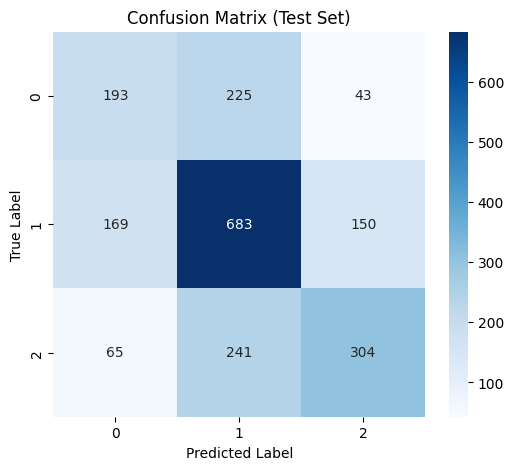

In [84]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(test_df['label'], y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

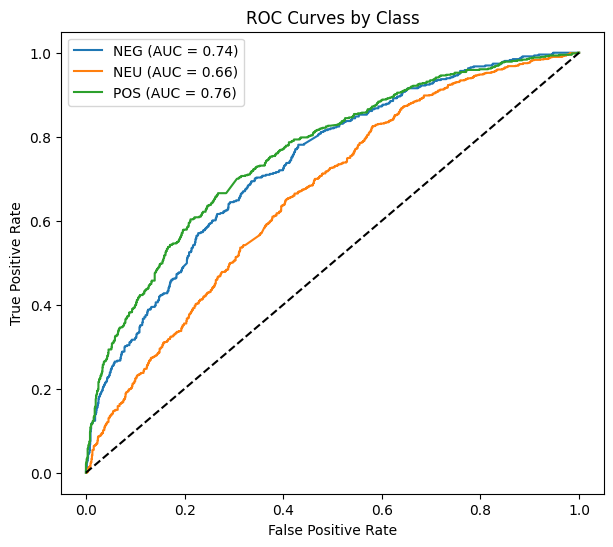

In [85]:
from sklearn.preprocessing import label_binarize
labels = sorted(df['label'].unique())
y_test_bin = label_binarize(test_df['label'], classes=labels)
y_pred_prob = model.predict_proba(X_test_tfidf)

plt.figure(figsize=(7,6))
for i, label in enumerate(labels):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curves by Class")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# SVM (preprocessed data + TF-IDF + oversample)

In [87]:
X = df['cleaned_text']
y = df['label']

# ================== 3. CHIA D·ªÆ LI·ªÜU ==================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

train_df = pd.DataFrame({'text': X_train, 'label': y_train}).reset_index(drop=True)
test_df = pd.DataFrame({'text': X_test, 'label': y_test}).reset_index(drop=True)

print("Train class counts (before balancing):\n", train_df['label'].value_counts())

# ================== 4. OVERSAMPLING TR√äN TRAIN ==================
class_counts = train_df['label'].value_counts()
max_count = class_counts.max()
oversampled = []

for cls, cnt in class_counts.items():
    cls_df = train_df[train_df['label'] == cls]
    if cnt < max_count:
        sampled = resample(cls_df, replace=True, n_samples=max_count, random_state=42)
        oversampled.append(sampled)
    else:
        oversampled.append(cls_df)

train_balanced = pd.concat(oversampled).sample(frac=1, random_state=42).reset_index(drop=True)
print("\nTrain class counts (after oversampling):\n", train_balanced['label'].value_counts())

# ================== 5. TF-IDF EMBEDDING ==================
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train_balanced['text'])
X_test_tfidf = vectorizer.transform(test_df['text'])

# ================== 6. HU·∫§N LUY·ªÜN SVM ==================
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_tfidf, train_balanced['label'])

y_pred_train = model.predict(X_train_tfidf)
y_pred_test  = model.predict(X_test_tfidf)

# metrics train
acc_tr = accuracy_score(train_balanced['label'], y_pred_train)
pre_tr = precision_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)
rec_tr = recall_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)
f1_tr  = f1_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)

# metrics test
acc_te = accuracy_score(test_df['label'], y_pred_test)
pre_te = precision_score(test_df['label'], y_pred_test, average='macro', zero_division=0)
rec_te = recall_score(test_df['label'], y_pred_test, average='macro', zero_division=0)
f1_te  = f1_score(test_df['label'], y_pred_test, average='macro', zero_division=0)

results = []
results.append({
        'Train_Acc': acc_tr, 'Train_Precision': pre_tr, 'Train_Recall': rec_tr, 'Train_F1': f1_tr,
        'Test_Acc': acc_te,  'Test_Precision': pre_te,  'Test_Recall': rec_te,  'Test_F1': f1_te
    })
metrics_df = pd.DataFrame(results)
metrics_df.index = ["Naive Bayes (preprocessed data + BoW + oversample)"]

# L√†m ƒë·∫πp k·∫øt qu·∫£
pd.options.display.float_format = "{:.2f}".format
metrics_df

Train class counts (before balancing):
 label
NEU    4006
POS    2441
NEG    1841
Name: count, dtype: int64

Train class counts (after oversampling):
 label
POS    4006
NEG    4006
NEU    4006
Name: count, dtype: int64


Train_Acc  \
Naive Bayes (preprocessed data + BoW + oversample)       0.69   

                                                    Train_Precision  \
Naive Bayes (preprocessed data + BoW + oversample)             0.81   

                                                    Train_Recall  Train_F1  \
Naive Bayes (preprocessed data + BoW + oversample)          0.69      0.68   

                                                    Test_Acc  Test_Precision  \
Naive Bayes (preprocessed data + BoW + oversample)      0.57            0.61   

                                                    Test_Recall  Test_F1  
Naive Bayes (preprocessed data + BoW + oversample)         0.48     0.48

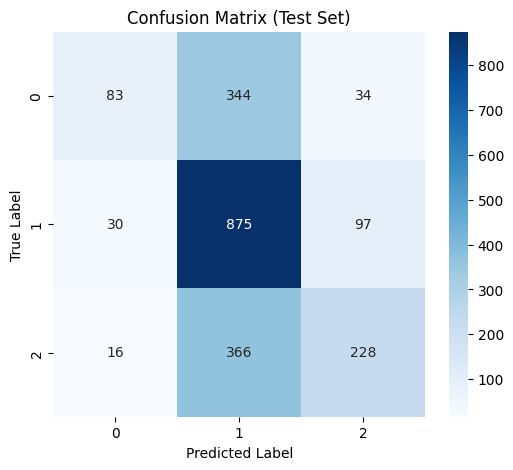

In [88]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(test_df['label'], y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

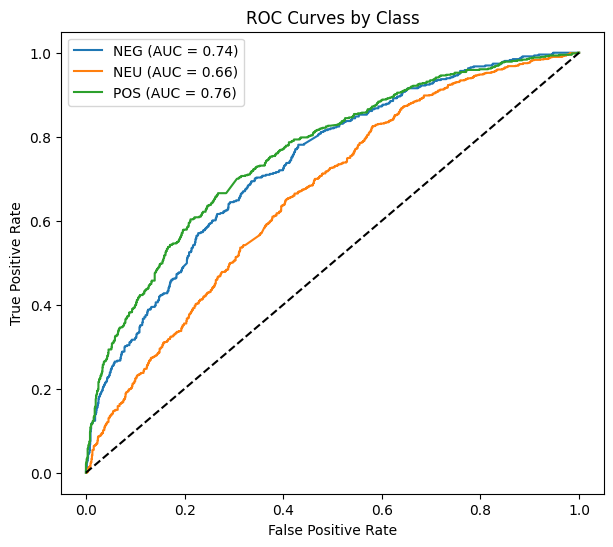

In [89]:
from sklearn.preprocessing import label_binarize
labels = sorted(df['label'].unique())
y_test_bin = label_binarize(test_df['label'], classes=labels)
y_pred_prob = model.predict_proba(X_test_tfidf)

plt.figure(figsize=(7,6))
for i, label in enumerate(labels):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curves by Class")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# SVM (preprocessed data + WordEmbedding + oversample)

In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)
from sentence_transformers import SentenceTransformer
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt



X = df['cleaned_text']
y = df["label"]

# --- 2. Chia d·ªØ li·ªáu train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 3. Oversampling ---
oversample = RandomOverSampler(random_state=42)
X_train_res, y_train_res = oversample.fit_resample(X_train.values.reshape(-1, 1), y_train)
X_train_res = X_train_res.ravel()

# --- 4. Sinh embedding t·ª´ E5 model ---
print("ƒêang t·∫£i m√¥ h√¨nh embedding 'intfloat/multilingual-e5-large' ...")
model = SentenceTransformer("intfloat/multilingual-e5-large")

print("ƒêang t·∫°o embedding cho t·∫≠p train v√† test ...")
emb_train = model.encode(X_train_res.tolist(), show_progress_bar=True)
emb_test = model.encode(X_test.tolist(), show_progress_bar=True)

# --- 5. Hu·∫•n luy·ªán m√¥ h√¨nh SVM ---
model = SVC(kernel="linear", probability=True, random_state=42)
model.fit(emb_train, y_train_res)



ƒêang t·∫£i m√¥ h√¨nh embedding 'intfloat/multilingual-e5-large' ...
ƒêang t·∫°o embedding cho t·∫≠p train v√† test ...


Batches:   0%|          | 0/376 [00:00<?, ?it/s]

Batches:   0%|          | 0/65 [00:00<?, ?it/s]

ValueError: X has 1024 features, but SVC is expecting 5000 features as input.

In [91]:
y_pred_train = model.predict(emb_train)
y_pred_test = model.predict(emb_test)

acc_tr = accuracy_score(train_balanced['label'], y_pred_train)
pre_tr = precision_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)
rec_tr = recall_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)
f1_tr  = f1_score(train_balanced['label'], y_pred_train, average='macro', zero_division=0)

# metrics test
acc_te = accuracy_score(test_df['label'], y_pred_test)
pre_te = precision_score(test_df['label'], y_pred_test, average='macro', zero_division=0)
rec_te = recall_score(test_df['label'], y_pred_test, average='macro', zero_division=0)
f1_te  = f1_score(test_df['label'], y_pred_test, average='macro', zero_division=0)

results = []
results.append({
        'Train_Acc': acc_tr, 'Train_Precision': pre_tr, 'Train_Recall': rec_tr, 'Train_F1': f1_tr,
        'Test_Acc': acc_te,  'Test_Precision': pre_te,  'Test_Recall': rec_te,  'Test_F1': f1_te
    })
metrics_df = pd.DataFrame(results)
metrics_df.index = ["Naive Bayes (preprocessed data + BoW + oversample)"]

# L√†m ƒë·∫πp k·∫øt qu·∫£
pd.options.display.float_format = "{:.2f}".format
metrics_df

Train_Acc  \
Naive Bayes (preprocessed data + BoW + oversample)       0.33   

                                                    Train_Precision  \
Naive Bayes (preprocessed data + BoW + oversample)             0.33   

                                                    Train_Recall  Train_F1  \
Naive Bayes (preprocessed data + BoW + oversample)          0.33      0.33   

                                                    Test_Acc  Test_Precision  \
Naive Bayes (preprocessed data + BoW + oversample)      0.60            0.59   

                                                    Test_Recall  Test_F1  
Naive Bayes (preprocessed data + BoW + oversample)         0.61     0.60

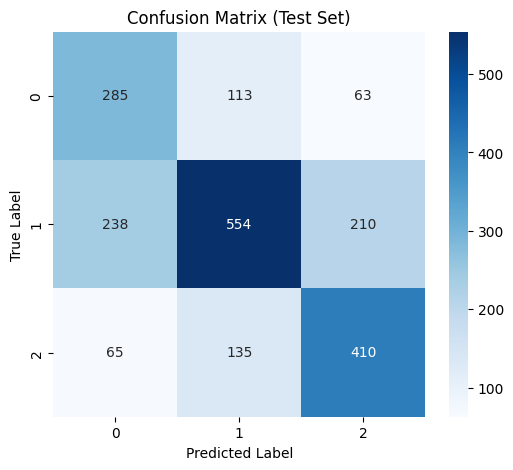

In [92]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(test_df['label'], y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()